In [1]:
import pandas as pd
import numpy as np

In [2]:
df1 = pd.read_excel("../case_study1.xlsx") #internal
df2 = pd.read_excel("../case_study2.xlsx") #cibil

Get a feel of the datasets

In [3]:
df1.head()

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,...,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL
0,1,5,4,1,0,0,0.000,0.0,0.200,0.800,...,0,0,1,0,4,1,4,0,72,18
1,2,1,0,1,0,0,0.000,0.0,1.000,0.000,...,0,1,0,0,0,0,1,0,7,7
2,3,8,0,8,1,0,0.125,0.0,1.000,0.000,...,0,6,1,0,0,2,6,0,47,2
3,4,1,0,1,1,0,1.000,0.0,1.000,0.000,...,0,0,0,0,0,0,1,1,5,5
4,5,3,2,1,0,0,0.000,0.0,0.333,0.667,...,0,0,0,0,0,3,0,2,131,32


In [4]:
df2.head()

,PROSPECTID,time_since_recent_payment,time_since_first_deliquency,time_since_recent_deliquency,num_times_delinquent,max_delinquency_level,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,...,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,max_unsec_exposure_inPct,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Credit_Score,Approved_Flag
0,1,549,35,15,11,29,29,0,0,0,...,0.0,0.0,0.0,13.333,1,0,PL,PL,696,P2
1,2,47,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,0.860,0,0,ConsumerLoan,ConsumerLoan,685,P2
2,3,302,11,3,9,25,25,1,9,8,...,0.0,0.0,0.0,5741.667,1,0,ConsumerLoan,others,693,P2
3,4,-99999,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,9.900,0,0,others,others,673,P2
4,5,583,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,-99999.000,0,0,AL,AL,753,P1


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51336 entries, 0 to 51335
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PROSPECTID            51336 non-null  int64  
 1   Total_TL              51336 non-null  int64  
 2   Tot_Closed_TL         51336 non-null  int64  
 3   Tot_Active_TL         51336 non-null  int64  
 4   Total_TL_opened_L6M   51336 non-null  int64  
 5   Tot_TL_closed_L6M     51336 non-null  int64  
 6   pct_tl_open_L6M       51336 non-null  float64
 7   pct_tl_closed_L6M     51336 non-null  float64
 8   pct_active_tl         51336 non-null  float64
 9   pct_closed_tl         51336 non-null  float64
 10  Total_TL_opened_L12M  51336 non-null  int64  
 11  Tot_TL_closed_L12M    51336 non-null  int64  
 12  pct_tl_open_L12M      51336 non-null  float64
 13  pct_tl_closed_L12M    51336 non-null  float64
 14  Tot_Missed_Pmnt       51336 non-null  int64  
 15  Auto_TL            

In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51336 entries, 0 to 51335
Data columns (total 62 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PROSPECTID                    51336 non-null  int64  
 1   time_since_recent_payment     51336 non-null  int64  
 2   time_since_first_deliquency   51336 non-null  int64  
 3   time_since_recent_deliquency  51336 non-null  int64  
 4   num_times_delinquent          51336 non-null  int64  
 5   max_delinquency_level         51336 non-null  int64  
 6   max_recent_level_of_deliq     51336 non-null  int64  
 7   num_deliq_6mts                51336 non-null  int64  
 8   num_deliq_12mts               51336 non-null  int64  
 9   num_deliq_6_12mts             51336 non-null  int64  
 10  max_deliq_6mts                51336 non-null  int64  
 11  max_deliq_12mts               51336 non-null  int64  
 12  num_times_30p_dpd             51336 non-null  int64  
 13  n

Descriptive stats

In [7]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
PROSPECTID,51336.0,25668.500000,14819.571046,1.0,12834.75,25668.500,38502.250,51336.0
Total_TL,51336.0,4.858598,7.177116,1.0,1.00,2.000,5.000,235.0
Tot_Closed_TL,51336.0,2.770415,5.941680,0.0,0.00,1.000,3.000,216.0
Tot_Active_TL,51336.0,2.088184,2.290774,0.0,1.00,1.000,3.000,47.0
Total_TL_opened_L6M,51336.0,0.736754,1.296717,0.0,0.00,0.000,1.000,27.0
Tot_TL_closed_L6M,51336.0,0.428919,0.989972,0.0,0.00,0.000,1.000,19.0
pct_tl_open_L6M,51336.0,0.184574,0.297414,0.0,0.00,0.000,0.308,1.0
pct_tl_closed_L6M,51336.0,0.089095,0.205635,0.0,0.00,0.000,0.053,1.0
pct_active_tl,51336.0,0.577542,0.379867,0.0,0.25,0.556,1.000,1.0
pct_closed_tl,51336.0,0.422458,0.379867,0.0,0.00,0.444,0.750,1.0


**Observation** : We see Age has -99999 as min value. So nulls are represented as this value.

In [8]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
PROSPECTID,51336.0,25668.500000,14819.571046,1.0,12834.750,25668.500,38502.25000,51336.000
time_since_recent_payment,51336.0,-8129.961314,27749.328514,-99999.0,46.000,70.000,161.00000,6065.000
time_since_first_deliquency,51336.0,-70020.091320,45823.312757,-99999.0,-99999.000,-99999.000,8.00000,35.000
time_since_recent_deliquency,51336.0,-70022.375838,45819.820741,-99999.0,-99999.000,-99999.000,3.00000,35.000
num_times_delinquent,51336.0,1.573749,4.165012,0.0,0.000,0.000,1.00000,74.000
max_delinquency_level,51336.0,-70003.987085,45847.976100,-99999.0,-99999.000,-99999.000,15.00000,900.000
max_recent_level_of_deliq,51336.0,13.521953,53.336976,0.0,0.000,0.000,10.00000,900.000
num_deliq_6mts,51336.0,0.184977,0.710240,0.0,0.000,0.000,0.00000,12.000
num_deliq_12mts,51336.0,0.480053,1.522210,0.0,0.000,0.000,0.00000,28.000
num_deliq_6_12mts,51336.0,0.295076,1.027471,0.0,0.000,0.000,0.00000,20.000


**Observation** : We see a few columns have -99999 as min value. So nulls are represented as this value.

How do we handle nulls? </br>
a) Drop </br>
b) simple impute </br>
c) rule based impute </br>

c) rule based: if columns have more than 10% of nulls we shall drop those columns. Then we shall drop nulls across the rows and see if we can retain atleast 70% of the dataset.

Handling df1

In [9]:
df1[df1['Age_Newest_TL'] != -99999].shape, df1[df1['Age_Newest_TL'] == -99999].shape

((51296, 26), (40, 26))

In [10]:
df1[df1['Age_Oldest_TL'] != -99999].shape, df1[df1['Age_Oldest_TL'] == -99999].shape

((51296, 26), (40, 26))

Since we are only loosing 40 rows out of 50k it is good to drop them.

In [11]:
df1 = df1[df1['Age_Newest_TL'] != -99999]
df1.shape

(51296, 26)

Handling df2

In [12]:
cols_to_remove_from_df2 = []

for col in df2.columns:
    if df2[df2[col] == -99999].shape[0] >= 10000:
        cols_to_remove_from_df2.append(col)

cols_to_remove_from_df2

['time_since_first_deliquency',
 'time_since_recent_deliquency',
 'max_delinquency_level',
 'max_deliq_6mts',
 'max_deliq_12mts',
 'CC_utilization',
 'PL_utilization',
 'max_unsec_exposure_inPct']

In [13]:
print("Before droping columns")
df2.shape

Before droping columns


(51336, 62)

In [14]:
df2 = df2.drop(cols_to_remove_from_df2, axis=1)
print("After droping columns")
df2.shape

After droping columns


(51336, 54)

Now handle nulls in the rows

In [15]:
df2.dropna().shape

(51336, 54)

In [16]:
for col in df2.columns:
    df2 = df2[df2[col] != -99999]

df2.shape

(42066, 54)

We retained more than 80% of the rows after dropping

In [17]:
df = pd.merge(df1, df2, how='inner', on='PROSPECTID')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42064 entries, 0 to 42063
Data columns (total 79 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   PROSPECTID                  42064 non-null  int64  
 1   Total_TL                    42064 non-null  int64  
 2   Tot_Closed_TL               42064 non-null  int64  
 3   Tot_Active_TL               42064 non-null  int64  
 4   Total_TL_opened_L6M         42064 non-null  int64  
 5   Tot_TL_closed_L6M           42064 non-null  int64  
 6   pct_tl_open_L6M             42064 non-null  float64
 7   pct_tl_closed_L6M           42064 non-null  float64
 8   pct_active_tl               42064 non-null  float64
 9   pct_closed_tl               42064 non-null  float64
 10  Total_TL_opened_L12M        42064 non-null  int64  
 11  Tot_TL_closed_L12M          42064 non-null  int64  
 12  pct_tl_open_L12M            42064 non-null  float64
 13  pct_tl_closed_L12M          420

In [19]:
df.shape

(42064, 79)

In [20]:
from scipy.stats import chi2_contingency
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import f_oneway

In [21]:
cat_cols = []
for col in df.columns:
    if col == 'Approved_Flag':
        continue
    if df[col].dtype == 'object':
        cat_cols.append(col)

cat_cols

['MARITALSTATUS', 'EDUCATION', 'GENDER', 'last_prod_enq2', 'first_prod_enq2']

In [22]:
# res = chi2_contingency(pd.crosstab(df['MARITALSTATUS'], df['Approved_Flag']))
# res.pvalue

In [23]:
for i in cat_cols:
    res = chi2_contingency(pd.crosstab(df[i], df['Approved_Flag']))
    if res.pvalue < 0.05:
        print(f"There is association between Approved Flag and {i}")

There is association between Approved Flag and MARITALSTATUS
There is association between Approved Flag and EDUCATION
There is association between Approved Flag and GENDER
There is association between Approved Flag and last_prod_enq2
There is association between Approved Flag and first_prod_enq2


Numerical columns - Since target column has more than 2 categories we use ANOVA rather than t-test. But before that I will check for multicollinearity within numerical columns. I will use VIF and lasso to do that.

In [24]:
num_cols = []
for col in df.columns:
    if col == 'Approved_Flag' or col=='PROSPECTID':
        continue
    if df[col].dtype != 'object':
        num_cols.append(col)

num_cols

['Total_TL',
 'Tot_Closed_TL',
 'Tot_Active_TL',
 'Total_TL_opened_L6M',
 'Tot_TL_closed_L6M',
 'pct_tl_open_L6M',
 'pct_tl_closed_L6M',
 'pct_active_tl',
 'pct_closed_tl',
 'Total_TL_opened_L12M',
 'Tot_TL_closed_L12M',
 'pct_tl_open_L12M',
 'pct_tl_closed_L12M',
 'Tot_Missed_Pmnt',
 'Auto_TL',
 'CC_TL',
 'Consumer_TL',
 'Gold_TL',
 'Home_TL',
 'PL_TL',
 'Secured_TL',
 'Unsecured_TL',
 'Other_TL',
 'Age_Oldest_TL',
 'Age_Newest_TL',
 'time_since_recent_payment',
 'num_times_delinquent',
 'max_recent_level_of_deliq',
 'num_deliq_6mts',
 'num_deliq_12mts',
 'num_deliq_6_12mts',
 'num_times_30p_dpd',
 'num_times_60p_dpd',
 'num_std',
 'num_std_6mts',
 'num_std_12mts',
 'num_sub',
 'num_sub_6mts',
 'num_sub_12mts',
 'num_dbt',
 'num_dbt_6mts',
 'num_dbt_12mts',
 'num_lss',
 'num_lss_6mts',
 'num_lss_12mts',
 'recent_level_of_deliq',
 'tot_enq',
 'CC_enq',
 'CC_enq_L6m',
 'CC_enq_L12m',
 'PL_enq',
 'PL_enq_L6m',
 'PL_enq_L12m',
 'time_since_recent_enq',
 'enq_L12m',
 'enq_L6m',
 'enq_L3m',

In [25]:
vif_important_cols = []

vif_data = df[num_cols]
total_cols = vif_data.shape[1]
col_idx = 0

#sequential VIF
for i in range(0, total_cols):
    vif_value = variance_inflation_factor(vif_data, col_idx)
    print(col_idx, "---", vif_value)

    if vif_value <= 5:
        vif_important_cols.append(num_cols[i])
        col_idx = col_idx + 1

    else:
        vif_data = vif_data.drop([num_cols[i]], axis=1)

D:\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


0 --- inf


D:\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


0 --- inf
0 --- 11.320180023967996
0 --- 8.363698035000327
0 --- 6.520647877790928
0 --- 5.149501618212625
0 --- 3.1705588221454675


D:\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


1 --- inf
1 --- 1788.1933594137697
1 --- 8.577587648997525
1 --- 3.8327688171005274
2 --- 5.095582490880041
2 --- 5.5813439950480594
2 --- 1.9778394318950563


D:\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


3 --- inf
3 --- 4.80293686982007
4 --- 23.260067091760725
4 --- 30.42526464659256
4 --- 4.3807211325991
5 --- 3.062524011658929
6 --- 2.732544346791884
7 --- 4.213848746963049
8 --- 2.202744273758091
9 --- 4.630453177417138
10 --- 5.174849822530086
10 --- 1.8966884528798647
11 --- 7.832958947944578
11 --- 5.254532562929874


D:\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


11 --- inf
11 --- 7.378201230885863
11 --- 1.4135838693103002
12 --- 8.077282577207265
12 --- 1.5173420025573947
13 --- 7.2456514713366
13 --- 15.55420833884174
13 --- 1.8176040868113492
14 --- 1.5056043102341168
15 --- 2.1709919101656525
16 --- 2.622054186862035
17 --- 2.295586305847375
18 --- 7.3577945452180336
18 --- 2.1581881209396574
19 --- 2.867643130780253
20 --- 6.456967362618825
20 --- 2.846287012753021
21 --- 1.4432508715970431
22 --- 16.057302758217613
22 --- 6.3999398336241535
22 --- 8.8775778083718
22 --- 2.377680719549069
23 --- 8.604221862778251
23 --- 13.048027699788369
23 --- 3.494579921362323
24 --- 1.8179316631456608
25 --- 16.84922186307213
25 --- 10.526499703844877
25 --- 2.3390342191611526
26 --- 22.097248612790537
26 --- 2.79623941701684
27 --- 3.4238587054514857
28 --- 7.669342302129587
28 --- 1.9744917367342674
29 --- 1.0011194056235158
30 --- 3.0644330667379087
31 --- 2.8106790463710745
32 --- 20.23998604695625
32 --- 15.858347137740253
32 --- 1.82266063066698

In [26]:
vif_data.shape

(42064, 36)

In [27]:
len(num_cols)

72

We were able to drop 36 columns because of multicollinearity

Now we can proceed to do ANOVA

In [28]:
num_cols_after_anova = []

for i in vif_important_cols:
    a = list(df[i])
    b = list(df['Approved_Flag'])

    group1 = [value for value, group in zip(a, b) if group == 'P1']
    group2 = [value for value, group in zip(a, b) if group == 'P2']
    group3 = [value for value, group in zip(a, b) if group == 'P3']
    group4 = [value for value, group in zip(a, b) if group == 'P4']

    res = f_oneway(group1, group2, group3, group4)

    if res.pvalue <= 0.05:
        num_cols_after_anova.append(i)

len(num_cols_after_anova)

34

Two columns are dropped after ANOVA

In [29]:
final_features = num_cols_after_anova + cat_cols + ['Approved_Flag']

In [30]:
df = df[final_features]
df.shape

(42064, 40)

In [31]:
df.head(2)

,pct_tl_closed_L6M,Tot_TL_closed_L12M,Tot_Missed_Pmnt,CC_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,...,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,HL_Flag,GL_Flag,MARITALSTATUS,EDUCATION,GENDER,last_prod_enq2,first_prod_enq2,Approved_Flag
0,0.0,0,0,0,0,4,1,4,0,72,...,0.0,0.0,1,0,Married,12TH,M,PL,PL,P2
1,0.0,0,0,0,0,0,0,1,0,7,...,0.0,0.0,0,0,Single,GRADUATE,F,ConsumerLoan,ConsumerLoan,P2


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42064 entries, 0 to 42063
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   pct_tl_closed_L6M           42064 non-null  float64
 1   Tot_TL_closed_L12M          42064 non-null  int64  
 2   Tot_Missed_Pmnt             42064 non-null  int64  
 3   CC_TL                       42064 non-null  int64  
 4   Home_TL                     42064 non-null  int64  
 5   PL_TL                       42064 non-null  int64  
 6   Secured_TL                  42064 non-null  int64  
 7   Unsecured_TL                42064 non-null  int64  
 8   Other_TL                    42064 non-null  int64  
 9   Age_Oldest_TL               42064 non-null  int64  
 10  time_since_recent_payment   42064 non-null  int64  
 11  num_deliq_6_12mts           42064 non-null  int64  
 12  num_times_60p_dpd           42064 non-null  int64  
 13  num_std_12mts               420

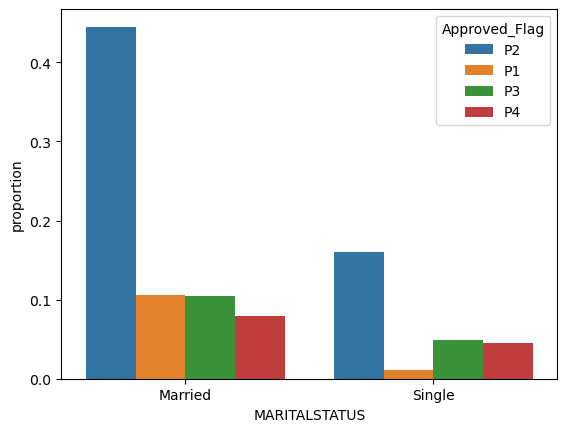

In [69]:
import seaborn as sns
marital_status = df[['MARITALSTATUS', 'Approved_Flag']].value_counts(normalize=True)
marital_status = pd.DataFrame(marital_status).reset_index()
marital_status_l3_plot = sns.barplot(marital_status, x='MARITALSTATUS', y='proportion', hue='Approved_Flag')
 
fig = marital_status_l3_plot.get_figure()
fig.savefig("marital_status_l3_plot.png") 

In [56]:
marital_status

,MARITALSTATUS,Approved_Flag,proportion
0,Married,P2,0.444989
1,Single,P2,0.160089
2,Married,P1,0.105435
3,Married,P3,0.104293
4,Married,P4,0.079545
5,Single,P3,0.048807
6,Single,P4,0.045597
7,Single,P1,0.011245


In [63]:
df.groupby('Approved_Flag').agg({'NETMONTHLYINCOME':'mean'})

,NETMONTHLYINCOME
Approved_Flag,
P1,29778.332111
P2,26442.043297
P3,26133.472671
P4,27607.271087


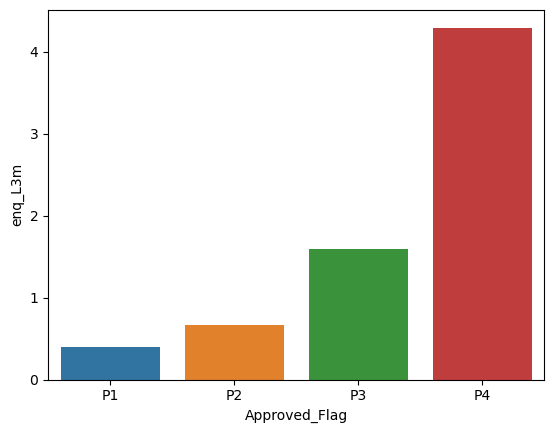

In [68]:
enq_l3 = df.groupby('Approved_Flag').agg({'enq_L3m':'mean'})
enq_l3 = enq_l3.reset_index()
enq_l3_plot = sns.barplot(enq_l3, x='Approved_Flag', y='enq_L3m')
fig = enq_l3_plot.get_figure()
fig.savefig("enq_l3_plot.png") 

FEATURE ENGINEERING

education --> Label encode

rest --> OHE

In [33]:
for i in cat_cols:
    print(df[i].unique())

['Married' 'Single']
['12TH' 'GRADUATE' 'SSC' 'POST-GRADUATE' 'UNDER GRADUATE' 'OTHERS'
 'PROFESSIONAL']
['M' 'F']
['PL' 'ConsumerLoan' 'AL' 'CC' 'others' 'HL']
['PL' 'ConsumerLoan' 'others' 'AL' 'HL' 'CC']


In [34]:
mapping = {
    '12TH' : 2,
    'GRADUATE' : 3,
    'SSC' :1,
    'POST-GRADUATE': 4,
    'UNDER GRADUATE': 3,
    'OTHERS': 1,
    'PROFESSIONAL':3
}

df['EDUCATION'] = df['EDUCATION'].replace(mapping).astype('int')

print(df['EDUCATION'].value_counts())

EDUCATION
3    18931
2    11703
1     9532
4     1898
Name: count, dtype: int64


In [35]:
#OHE
df_encoded = pd.get_dummies(df, columns=['MARITALSTATUS', 'GENDER', 'last_prod_enq2', 'first_prod_enq2'], drop_first=True)
df_encoded.shape

(42064, 48)

In [36]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42064 entries, 0 to 42063
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   pct_tl_closed_L6M             42064 non-null  float64
 1   Tot_TL_closed_L12M            42064 non-null  int64  
 2   Tot_Missed_Pmnt               42064 non-null  int64  
 3   CC_TL                         42064 non-null  int64  
 4   Home_TL                       42064 non-null  int64  
 5   PL_TL                         42064 non-null  int64  
 6   Secured_TL                    42064 non-null  int64  
 7   Unsecured_TL                  42064 non-null  int64  
 8   Other_TL                      42064 non-null  int64  
 9   Age_Oldest_TL                 42064 non-null  int64  
 10  time_since_recent_payment     42064 non-null  int64  
 11  num_deliq_6_12mts             42064 non-null  int64  
 12  num_times_60p_dpd             42064 non-null  int64  
 13  n

In [37]:
for col in df_encoded.columns:
    if df_encoded[col].dtype == 'bool':
        # print(col)
        df_encoded[col] = df_encoded[col].astype('int16')

df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42064 entries, 0 to 42063
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   pct_tl_closed_L6M             42064 non-null  float64
 1   Tot_TL_closed_L12M            42064 non-null  int64  
 2   Tot_Missed_Pmnt               42064 non-null  int64  
 3   CC_TL                         42064 non-null  int64  
 4   Home_TL                       42064 non-null  int64  
 5   PL_TL                         42064 non-null  int64  
 6   Secured_TL                    42064 non-null  int64  
 7   Unsecured_TL                  42064 non-null  int64  
 8   Other_TL                      42064 non-null  int64  
 9   Age_Oldest_TL                 42064 non-null  int64  
 10  time_since_recent_payment     42064 non-null  int64  
 11  num_deliq_6_12mts             42064 non-null  int64  
 12  num_times_60p_dpd             42064 non-null  int64  
 13  n

In [38]:
df_encoded.to_csv("encoded_data.csv", index=False)

In [39]:
df_encoded_csv = pd.read_csv("encoded_data.csv")
df_encoded_csv.head()

,pct_tl_closed_L6M,Tot_TL_closed_L12M,Tot_Missed_Pmnt,CC_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,...,last_prod_enq2_CC,last_prod_enq2_ConsumerLoan,last_prod_enq2_HL,last_prod_enq2_PL,last_prod_enq2_others,first_prod_enq2_CC,first_prod_enq2_ConsumerLoan,first_prod_enq2_HL,first_prod_enq2_PL,first_prod_enq2_others
0,0.0,0,0,0,0,4,1,4,0,72,...,0,0,0,1,0,0,0,0,1,0
1,0.0,0,0,0,0,0,0,1,0,7,...,0,1,0,0,0,0,1,0,0,0
2,0.0,0,1,0,0,0,2,6,0,47,...,0,1,0,0,0,0,0,0,0,1
3,0.0,0,0,0,0,0,3,0,2,131,...,0,0,0,0,0,0,0,0,0,0
4,0.0,1,0,0,0,0,6,0,0,150,...,0,1,0,0,0,0,0,0,1,0


In [40]:
df_encoded_csv.shape

(42064, 48)

In [41]:
df_encoded_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42064 entries, 0 to 42063
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   pct_tl_closed_L6M             42064 non-null  float64
 1   Tot_TL_closed_L12M            42064 non-null  int64  
 2   Tot_Missed_Pmnt               42064 non-null  int64  
 3   CC_TL                         42064 non-null  int64  
 4   Home_TL                       42064 non-null  int64  
 5   PL_TL                         42064 non-null  int64  
 6   Secured_TL                    42064 non-null  int64  
 7   Unsecured_TL                  42064 non-null  int64  
 8   Other_TL                      42064 non-null  int64  
 9   Age_Oldest_TL                 42064 non-null  int64  
 10  time_since_recent_payment     42064 non-null  int64  
 11  num_deliq_6_12mts             42064 non-null  int64  
 12  num_times_60p_dpd             42064 non-null  int64  
 13  n

In [1]:
df_encoded_csv['Approved_Flag'].value_counts()

NameError: name 'df_encoded_csv' is not defined

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

# Function to train and evaluate a model
def train_and_evaluate_model(model, params, X_train, y_train, X_test, y_test):
    # Train the model
    # model.fit(X_train, y_train)
    model.set_params(**best_params)
    model.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    # f1 = f1_score(y_test, y_pred, average='macro')
    # precision = precision_score(y_test, y_pred, average='macro')
    # recall = recall_score(y_test, y_pred, average='macro')

    accuracy = model.score(X_test, y_test)
    print("Test Accuracy:", accuracy)

    f1 = f1_score(y_test, y_pred, average=None)
    precision = precision_score(y_test, y_pred, average=None)
    recall = recall_score(y_test, y_pred, average=None)
    
    return f1, precision, recall, accuracy

# Function for cross-validation and hyperparameter tuning
def perform_cross_validation(model, params, X_train, y_train, cv=5):
    # grid_search = GridSearchCV(model, param_grid=params, cv=cv, scoring='f1_macro')
    grid_search = GridSearchCV(model, param_grid=params, cv=cv, scoring='f1_micro')
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    
    return best_model, best_params, best_score

# Load your dataset and preprocess as needed
# Assuming your dataframe is df with features and target column

# Split data into train and test sets
X = df_encoded_csv.drop(columns=['Approved_Flag'])
y = df_encoded_csv['Approved_Flag']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'LDA': LinearDiscriminantAnalysis(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(objective='multi:softmax',  num_class=4)
}

# testing
# params = {
#     'Logistic Regression': {'C': [0.001]},
#     'LDA': {'solver': ['svd']},
#     'Random Forest': {'n_estimators': [50]},
#     'XGBoost': {'n_estimators': [50], 'learning_rate': [0.01]}
# }

params = {
    'Logistic Regression': {'C': [0.001, 0.01, 0.1, 1.0], 'penalty': ['l1', 'l2']},
    'LDA': {'solver': ['svd']},
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [10, 20], 'min_samples_split': [5, 7, 10], 'min_samples_leaf': [4, 7, 10]},
    'XGBoost': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 5, 7], 'subsample': [0.8, 1.0], 'colsample_bytree': [0.8, 1.0]}
}

In [ ]:
# Train and evaluate models
import timeit

results = {}
for name, model in models.items():
    start = timeit.default_timer()
    print(f"Training and evaluating {name}...")
    
    # Perform cross-validation and hyperparameter tuning
    best_model, best_params, best_score = perform_cross_validation(model, params[name], X_train, y_train, cv=5)
    
    # Train and evaluate best model on test set
    f1, precision, recall, accuracy = train_and_evaluate_model(best_model, best_params, X_train, y_train, X_test, y_test)
    
    # Store results
    results[name] = {
        'Best Model': best_model,
        'Best Parameters': best_params,
        'Best_F1_Score_(CV)': best_score,
        'F1_Score': f1,
        'Precision': precision,
        'Recall': recall,
        'Accuracy': accuracy
    }

    end = timeit.default_timer()

    # Calculate the elapsed time
    elapsed_time = end - start
    
    print(f"Elapsed Time: {elapsed_time} seconds")

In [ ]:

for name, result in results.items():
    print(f"\n{name} Results:")
    print("Best Parameters:", result['Best Parameters'])
    print("Accuracy:", result['Accuracy'])
    print("Best F1 Score (CV):", result['Best_F1_Score_(CV)'])
    print("F1 Score (Test):", result['F1_Score'])
    print("Precision (Test):", result['Precision'])
    print("Recall (Test):", result['Recall'])


In [ ]:
lr= pd.DataFrame()
lda= pd.DataFrame()
rf= pd.DataFrame()
xgb= pd.DataFrame()

models_df = [lr, lda, rf, xgb]

counter = 0
for name, result in results.items():
    print("F1 CV = ", result['Best_F1_Score_(CV)'])
    print("Accuracy on Test set = ", result['Accuracy'])
    data = {
        'F1': result['F1_Score'],
        'Precision': result['Precision'],
        'Recall': result['Recall']
    }
    print(pd.DataFrame(data))
    # print(type(modls[counter]), modls[counter])
    models_df[counter] = pd.DataFrame(data)
    counter += 1


In [ ]:
models_df[0]

In [ ]:
import matplotlib.pyplot as plt

# Define the models' names
class_names = ['P1', 'P2', 'P3', 'P4']
model_names = ['logistic', 'LDA', 'RF', 'XGBoost']

# Define the metrics
metrics = ['F1', 'Precision', 'Recall']

# Set the figure size
plt.figure(figsize=(12, 8))

# Loop through each metric
for metric in metrics:
    # Create a subplot for the current metric
    plt.subplot(3, 1, metrics.index(metric) + 1)
    
    # Loop through each model dataframe
    for i, model_df in enumerate(models_df):
        # Extract the metric values for the current model
        values = model_df[metric]
        
        # Plot the values as a bar for the current model
        plt.bar([x + i * 0.2 for x in range(len(model_names))], values, width=0.2, label=model_names[i])
    
    # Add labels and title for the current subplot
    plt.xlabel('Models')
    plt.ylabel(metric)
    plt.title(f'{metric} Scores for Different Models')
    plt.xticks([x + 0.3 for x in range(len(class_names))], class_names)
    plt.legend(fontsize=8)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.utils.class_weight import compute_class_weight

# Assuming y_train contains integer labels representing class indices

# Compute class weights based on class frequencies
class_labels = np.unique(y_train)
class_weights = compute_class_weight('balanced', classes=class_labels, y=y_train)

# Normalize class weights to sum up to 1
class_weights /= np.sum(class_weights)

print("Class Weights based on Class Frequencies:")
for class_label, weight in zip(class_labels, class_weights):
    print(f"Class {class_label}: {weight}")


In [ ]:
# from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, precision_score, recall_score
# from xgboost import XGBClassifier
# from sklearn.preprocessing import LabelEncoder
# import numpy as np

# Function to train and evaluate a model
def train_and_evaluate_model(model, params, X_train, y_train, X_test, y_test):
    # Train the model
    model.set_params(**params)
    model.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = model.predict(X_test)

    accuracy = model.score(X_test, y_test)
    print("Test Accuracy:", accuracy)

    # Calculate evaluation metrics
    f1 = f1_score(y_test, y_pred, average=None)
    precision = precision_score(y_test, y_pred, average=None)
    recall = recall_score(y_test, y_pred, average=None)
    
    return f1, precision, recall

# Function for cross-validation and hyperparameter tuning
def perform_cross_validation(model, params, X_train, y_train, sample_weights=None, cv=5):
    if sample_weights is None:
        sample_weights = np.ones(len(y_train))  # Default equal weights if not provided
    
    grid_search = GridSearchCV(model, param_grid=params, cv=cv, scoring='f1_macro')
    grid_search.fit(X_train, y_train, sample_weight=sample_weights)
    
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    
    return best_model, best_params, best_score

# Load your dataset and preprocess as needed
# Assuming your dataframe is df with features and target column

# Split data into train and test sets
X = df_encoded_csv.drop(columns=['Approved_Flag'])
y = df_encoded_csv['Approved_Flag']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Define XGBoost model
xgb_model = XGBClassifier(objective='multi:softmax', num_class=4)

# Define hyperparameters for tuning
params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Define class weights (you can adjust these based on class frequencies)
class_weights = {
    0: 0.34823940550890814,  # Class 0 weight
    1: 0.06644995565500506,  # Class 1 weight
    2: 0.2651112893551688,  # Class 2 weight (for example, giving more weight to class 2)
    3: 0.3201993494809181   # Class 3 weight
}

# Perform cross-validation and hyperparameter tuning
best_model, best_params, best_score = perform_cross_validation(xgb_model, params, X_train, y_train, sample_weights=[class_weights[y] for y in y_train], cv=5)


In [ ]:
# Print best parameters and score
print("Best Parameters:", best_params)
print("Best F1 Score (CV):", best_score)

# Train and evaluate best model on test set
f1_test, precision_test, recall_test = train_and_evaluate_model(best_model, best_params, X_train, y_train, X_test, y_test)

# Print metrics for each class
for i in range(4):
    print(f"Class {i} - F1 Score: {f1_test[i]}, Precision: {precision_test[i]}, Recall: {recall_test[i]}")


In [ ]:
imp = {
        'features': X_train.columns,
        'importance': best_model.feature_importances_
}
pd.DataFrame(imp).sort_values(by='importance', ascending=True)[-10:].set_index('features').plot(kind='barh')

In [ ]:
df.Approved_Flag.value_counts(normalize=True).plot(kind='bar')

In [ ]:
# from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, precision_score, recall_score
# from xgboost import XGBClassifier
# from sklearn.preprocessing import LabelEncoder
# import numpy as np

# Function to train and evaluate a model
def train_and_evaluate_model(model, params, X_train, y_train, X_test, y_test):
    # Train the model
    model.set_params(**params)
    model.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = model.predict(X_test)

    accuracy = model.score(X_test, y_test)
    print("Test Accuracy:", accuracy)

    # Calculate evaluation metrics
    f1 = f1_score(y_test, y_pred, average=None)
    precision = precision_score(y_test, y_pred, average=None)
    recall = recall_score(y_test, y_pred, average=None)
    
    return f1, precision, recall, y_pred

# Function for cross-validation and hyperparameter tuning
def perform_cross_validation(model, params, X_train, y_train, sample_weights=None, cv=5):
    if sample_weights is None:
        sample_weights = np.ones(len(y_train))  # Default equal weights if not provided
    
    grid_search = GridSearchCV(model, param_grid=params, cv=cv, scoring='roc_auc')
    grid_search.fit(X_train, y_train, sample_weight=sample_weights)
    
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    
    return best_model, best_params, best_score

# Load your dataset and preprocess as needed
# Assuming your dataframe is df with features and target column

# Split data into train and test sets
X = df_encoded_csv.drop(columns=['Approved_Flag'])
y = df_encoded_csv['Approved_Flag']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Define XGBoost model
xgb_model = XGBClassifier(objective='multi:softmax', num_class=4)

# Define hyperparameters for tuning
params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Define class weights (you can adjust these based on class frequencies)
class_weights = {
    0: 0.34823940550890814,  # Class 0 weight
    1: 0.06644995565500506,  # Class 1 weight
    2: 0.2651112893551688,  # Class 2 weight (for example, giving more weight to class 2)
    3: 0.3201993494809181   # Class 3 weight
}

# Perform cross-validation and hyperparameter tuning
best_model, best_params, best_score = perform_cross_validation(xgb_model, params, X_train, y_train, sample_weights=None, cv=5)


Training and evaluating Logistic Regression with thresholding...


D:\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

Thresholds........
[0.17838368168910804, 0.5084901760035567, 0.19587780537199911, 0.14703862929486342]
..................


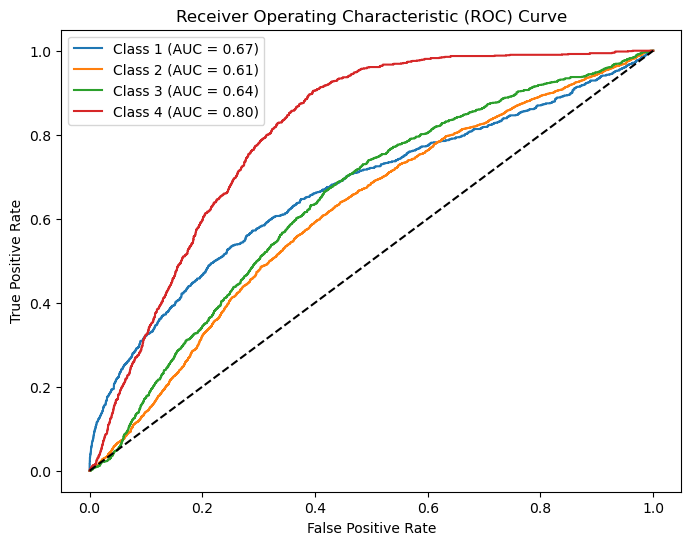

ValueError: Classification metrics can't handle a mix of multiclass and multilabel-indicator targets

In [61]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np
import timeit
from sklearn.preprocessing import label_binarize

# Function to train and evaluate a model with thresholding
def train_and_evaluate_model_with_threshold(model, params, X_train, y_train, X_test, y_test):
    # Train the model
    model.set_params(**best_params)
    model.fit(X_train, y_train)
    
    # Predict probabilities on test set
    y_pred_proba = model.predict_proba(X_test)
    
    # Initialize arrays to store AUC scores and thresholds
    auc_scores = []
    thresholds = []
    y_test_reshaped = label_binarize(y_test,classes=np.unique(y_test))
    for i in range(y_test_reshaped.shape[1]):
    # Calculate AUC score for each class and find optimal threshold
    # for i in range(y_test.shape[1]):
        auc_score = roc_auc_score(y_test_reshaped[:, i], y_pred_proba[:, i])
        auc_scores.append(auc_score)
        fpr, tpr, threshold = roc_curve(y_test_reshaped[:, i], y_pred_proba[:, i])
        optimal_threshold_index = np.argmax(tpr - fpr)
        optimal_threshold = threshold[optimal_threshold_index]
        thresholds.append(optimal_threshold)

    print("Thresholds........")
    print(thresholds)
    print("..................")
    
    # Plot AUC-ROC curves for each class
    plt.figure(figsize=(8, 6))
    for i in range(y_test_reshaped.shape[1]):
        fpr, tpr, _ = roc_curve(y_test_reshaped[:, i], y_pred_proba[:, i])
        plt.plot(fpr, tpr, label=f"Class {i+1} (AUC = {auc_scores[i]:.2f})")
    plt.plot([0, 1], [0, 1], linestyle='--', color='k')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

    # Apply thresholding to predicted probabilities
    y_pred_threshold = (y_pred_proba >= thresholds).astype(int)
    
    # Calculate evaluation metrics
    f1 = f1_score(y_test, y_pred_threshold, average=None)
    precision = precision_score(y_test, y_pred_threshold, average=None)
    recall = recall_score(y_test, y_pred_threshold, average=None)
    accuracy = model.score(X_test, y_test)
    
    return f1, precision, recall, accuracy, thresholds

# Function for cross-validation and hyperparameter tuning
def perform_cross_validation(model, params, X_train, y_train, cv=5):
    grid_search = GridSearchCV(model, param_grid=params, cv=cv, scoring='f1_macro')
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    
    return best_model, best_params, best_score

# Load your dataset and preprocess as needed
# Assuming your dataframe is df with features and target column

# Split data into train and test sets
X = df_encoded_csv.drop(columns=['Approved_Flag'])
y = df_encoded_csv['Approved_Flag']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'LDA': LinearDiscriminantAnalysis(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(objective='multi:softmax',  num_class=4)
}

params = {
    'Logistic Regression': {'C': [0.001]},
    'LDA': {'solver': ['svd']},
    'Random Forest': {'n_estimators': [50]},
    'XGBoost': {'n_estimators': [50]}
}

# Train and evaluate models with thresholding
results_with_thresholds = {}
for name, model in models.items():
    start = timeit.default_timer()
    print(f"Training and evaluating {name} with thresholding...")
    
    # Perform cross-validation and hyperparameter tuning
    best_model, best_params, best_score = perform_cross_validation(model, params[name], X_train, y_train, cv=2)
    
    # Train and evaluate best model on test set with thresholding
    f1, precision, recall, accuracy, thresholds = train_and_evaluate_model_with_threshold(best_model, best_params, X_train, y_train, X_test, y_test)
    
    # Store results
    results_with_thresholds[name] = {
        'Best Model': best_model,
        'Best Parameters': best_params,
        'Best_F1_Score_(CV)': best_score,
        'F1_Score': f1,
        'Precision': precision,
        'Recall': recall,
        'Accuracy': accuracy,
        'Thresholds': thresholds
    }

    end = timeit.default_timer()

    # Calculate the elapsed time
    elapsed_time = end - start
    
    print(f"Elapsed Time: {elapsed_time} seconds")


In [56]:
y_test.shape

(8413,)

Training and evaluating Logistic Regression...


D:\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

Test Accuracy: 0.5952692261975514


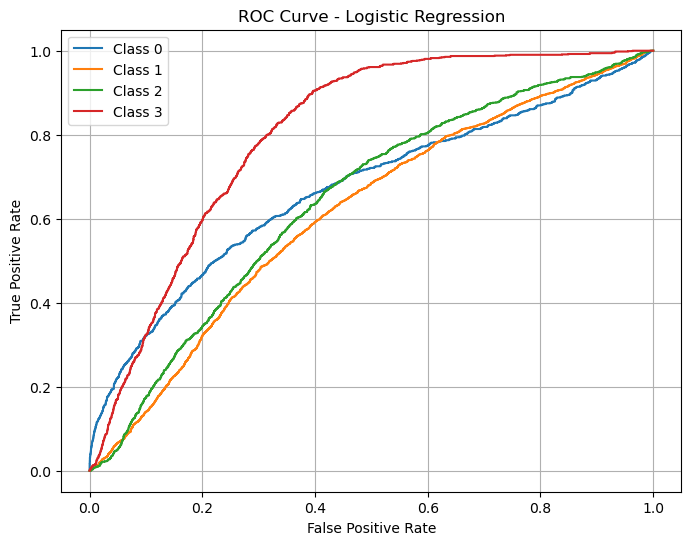

Elapsed Time: 5.522358200003509 seconds
Training and evaluating LDA...
Test Accuracy: 0.7331510757161536


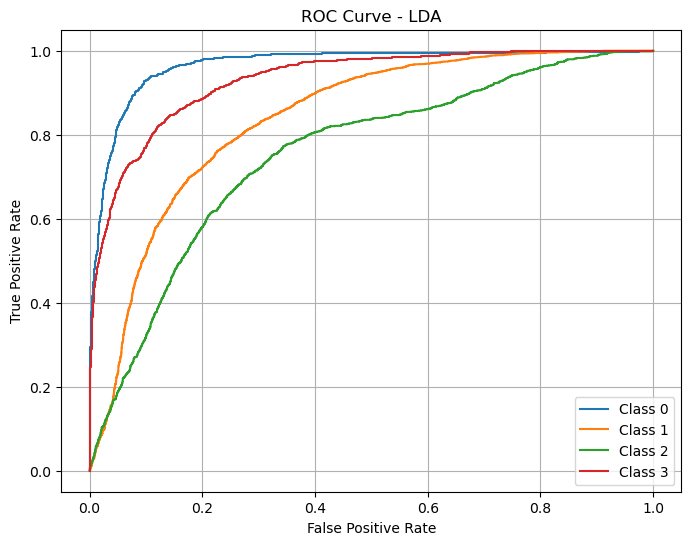

Elapsed Time: 3.482073799998034 seconds
Training and evaluating Random Forest...
Test Accuracy: 0.7575181267086651


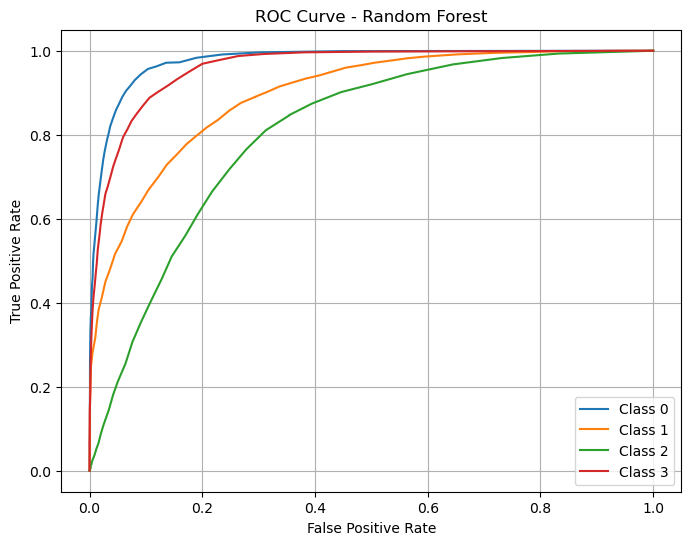

Elapsed Time: 33.62181640000199 seconds
Training and evaluating XGBoost...
Test Accuracy: 0.7738024485914656


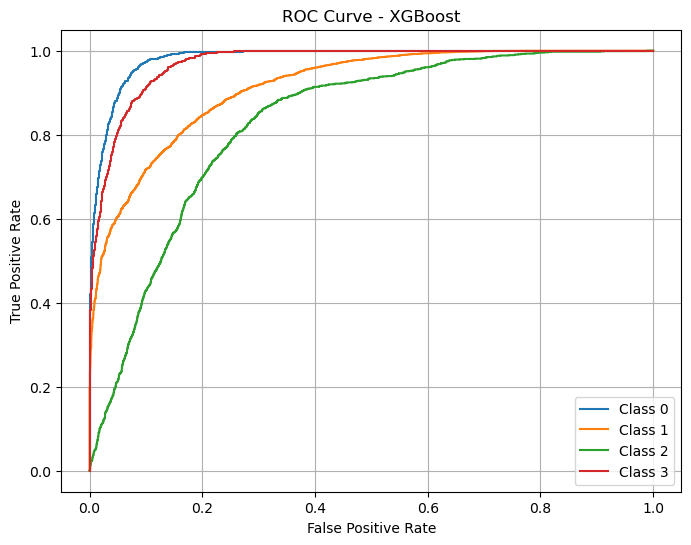

Elapsed Time: 6.278140799986431 seconds
ROC AUC scores for Logistic Regression: [0.6694181179662586, 0.614167975159432, 0.6440272158098727, 0.802302564734298]
ROC AUC scores for LDA: [0.9659016237867851, 0.8385374268166077, 0.7536215341368883, 0.9306568084593381]
ROC AUC scores for Random Forest: [0.976276379904209, 0.8941804048598244, 0.8054576962391925, 0.960199909556765]
ROC AUC scores for XGBoost: [0.9825170947723891, 0.9144395805917761, 0.8286545955960647, 0.9713403392621558]


In [77]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

# Function to train and evaluate a model
def train_and_evaluate_model(model, params, X_train, y_train, X_test, y_test):
    # Train the model
    model.set_params(**params)
    model.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)
    
    # Calculate evaluation metrics
    accuracy = model.score(X_test, y_test)
    print("Test Accuracy:", accuracy)

    f1 = f1_score(y_test, y_pred, average=None)
    precision = precision_score(y_test, y_pred, average=None)
    recall = recall_score(y_test, y_pred, average=None)
    
    return f1, precision, recall, accuracy, y_pred_proba

# Function for cross-validation and hyperparameter tuning
def perform_cross_validation(model, params, X_train, y_train, cv=5):
    grid_search = GridSearchCV(model, param_grid=params, cv=cv, scoring='f1_macro')
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    
    return best_model, best_params, best_score

# Load your dataset and preprocess as needed
# Assuming your dataframe is df with features and target column

# Split data into train and test sets
X = df_encoded_csv.drop(columns=['Approved_Flag'])
y = df_encoded_csv['Approved_Flag']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'LDA': LinearDiscriminantAnalysis(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(objective='multi:softmax',  num_class=4)
}

# testing
params = {
    'Logistic Regression': {'C': [0.001]},
    'LDA': {'solver': ['svd']},
    'Random Forest': {'n_estimators': [50]},
    'XGBoost': {'n_estimators': [50]}
}

# Train and evaluate models
import timeit
from sklearn.preprocessing import label_binarize

results = {}
roc_auc_scores = {}
for name, model in models.items():
    start = timeit.default_timer()
    print(f"Training and evaluating {name}...")
    
    # Perform cross-validation and hyperparameter tuning
    best_model, best_params, best_score = perform_cross_validation(model, params[name], X_train, y_train, cv=2)
    
    # Train and evaluate best model on test set
    f1, precision, recall, accuracy, y_pred_proba = train_and_evaluate_model(best_model, best_params, X_train, y_train, X_test, y_test)
    
    # Store results
    results[name] = {
        'Best Model': best_model,
        'Best Parameters': best_params,
        'Best_F1_Score_(CV)': best_score,
        'F1_Score': f1,
        'Precision': precision,
        'Recall': recall,
        'Accuracy': accuracy,
        'proba': y_pred_proba,
        'y_test': y_test,
        
    }

    # Calculate ROC AUC scores for each class
    auc_scores = []
    y_test_reshaped = label_binarize(y_test,classes=np.unique(y_test))
    for i in range(y_test_reshaped.shape[1]):
        auc_score = roc_auc_score(y_test_reshaped[:, i], y_pred_proba[:, i], multi_class='ovr')
        auc_scores.append(auc_score)
    roc_auc_scores[name] = auc_scores

    # Plot ROC curve for each class
    roc_curves = []
    plt.figure(figsize=(8, 6))
    for i in range(y_test_reshaped.shape[1]):
        fpr, tpr, thresholds = roc_curve(y_test_reshaped[:, i], y_pred_proba[:, i])
        # for j in range(len(fpr)):
        #     plt.text(fpr[j], tpr[j], f'{thresholds[j]:.2f}', fontsize=8)
        plt.plot(fpr, tpr, label=f'Class {i}')

        roc_curve_df = pd.DataFrame({
                'FPR': fpr,
                'TPR': tpr,
                'Threshold': thresholds
            })
        roc_curves.append(roc_curve_df)
    
    # Store roc curves dataframe in results
    results[name]['ROC_Curves'] = roc_curves
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {name}')
    plt.legend()
    plt.grid(True)
    plt.show()


    end = timeit.default_timer()

    # Calculate the elapsed time
    elapsed_time = end - start
    
    print(f"Elapsed Time: {elapsed_time} seconds")

# Print ROC AUC scores
for name, scores in roc_auc_scores.items():
    print(f"ROC AUC scores for {name}: {scores}")


In [66]:
results['Logistic Regression']['proba'].shape, results['Logistic Regression']['y_test'].shape

((8413, 4), (8413,))

In [90]:
results['Logistic Regression']['ROC_Curves'][0]

,FPR,TPR,Threshold
0,0.000000,0.000000,1.983166e+00
1,0.000000,0.000986,9.831663e-01
2,0.000000,0.013807,9.289004e-01
3,0.000135,0.013807,9.262030e-01
4,0.000135,0.016765,9.054919e-01
...,...,...,...
1619,0.995134,0.998028,9.892279e-04
1620,0.995134,0.999014,8.494092e-04
1621,0.997702,0.999014,1.555861e-04
1622,0.997702,1.000000,1.344749e-04


In [97]:
def get_threshold_range(roc_curve_df, min_tpr, max_tpr, min_fpr, max_fpr):
    filtered_df = roc_curve_df[(roc_curve_df['TPR'] >= min_tpr) & 
                               (roc_curve_df['TPR'] <= max_tpr) &
                               (roc_curve_df['FPR'] >= min_fpr) &
                               (roc_curve_df['FPR'] <= max_fpr)]
    min_threshold = filtered_df['Threshold'].min()
    max_threshold = filtered_df['Threshold'].max()
    return min_threshold, max_threshold

# Example usage
model_name = 'XGBoost'
min_tpr = 0.93
max_tpr = 0.97
min_fpr = 0.03
max_fpr = 0.07
roc_curve_df = results[model_name]['ROC_Curves'][0]  # Assuming you want to access the ROC curve for the first class
min_threshold, max_threshold = get_threshold_range(roc_curve_df, min_tpr, max_tpr, min_fpr, max_fpr)
print(f"Threshold range for TPR ({min_tpr}, {max_tpr}) and FPR ({min_fpr}, {max_fpr}): {min_threshold} to {max_threshold}")


Threshold range for TPR (0.93, 0.97) and FPR (0.03, 0.07): 0.12396347522735596 to 0.12808777391910553


In [98]:
def get_threshold_range(roc_curve_df, min_tpr, max_tpr, min_fpr, max_fpr):
    filtered_df = roc_curve_df[(roc_curve_df['TPR'] >= min_tpr) & 
                               (roc_curve_df['TPR'] <= max_tpr) &
                               (roc_curve_df['FPR'] >= min_fpr) &
                               (roc_curve_df['FPR'] <= max_fpr)]
    min_threshold = filtered_df['Threshold'].min()
    max_threshold = filtered_df['Threshold'].max()
    return min_threshold, max_threshold

# Example usage
model_name = 'XGBoost'
min_tpr = 0.8
max_tpr = 0.85
min_fpr = 0.17
max_fpr = 0.2
roc_curve_df = results[model_name]['ROC_Curves'][1]  # Assuming you want to access the ROC curve for the first class
min_threshold, max_threshold = get_threshold_range(roc_curve_df, min_tpr, max_tpr, min_fpr, max_fpr)
print(f"Threshold range for TPR ({min_tpr}, {max_tpr}) and FPR ({min_fpr}, {max_fpr}): {min_threshold} to {max_threshold}")


Threshold range for TPR (0.8, 0.85) and FPR (0.17, 0.2): 0.6178677082061768 to 0.6675282716751099


In [99]:
def get_threshold_range(roc_curve_df, min_tpr, max_tpr, min_fpr, max_fpr):
    filtered_df = roc_curve_df[(roc_curve_df['TPR'] >= min_tpr) & 
                               (roc_curve_df['TPR'] <= max_tpr) &
                               (roc_curve_df['FPR'] >= min_fpr) &
                               (roc_curve_df['FPR'] <= max_fpr)]
    min_threshold = filtered_df['Threshold'].min()
    max_threshold = filtered_df['Threshold'].max()
    return min_threshold, max_threshold

# Example usage
model_name = 'XGBoost'
min_tpr = 0.82
max_tpr = 0.87
min_fpr = 0.3
max_fpr = 0.35
roc_curve_df = results[model_name]['ROC_Curves'][2]  # Assuming you want to access the ROC curve for the first class
min_threshold, max_threshold = get_threshold_range(roc_curve_df, min_tpr, max_tpr, min_fpr, max_fpr)
print(f"Threshold range for TPR ({min_tpr}, {max_tpr}) and FPR ({min_fpr}, {max_fpr}): {min_threshold} to {max_threshold}")


Threshold range for TPR (0.82, 0.87) and FPR (0.3, 0.35): 0.12462949007749557 to 0.14103668928146362


In [100]:
def get_threshold_range(roc_curve_df, min_tpr, max_tpr, min_fpr, max_fpr):
    filtered_df = roc_curve_df[(roc_curve_df['TPR'] >= min_tpr) & 
                               (roc_curve_df['TPR'] <= max_tpr) &
                               (roc_curve_df['FPR'] >= min_fpr) &
                               (roc_curve_df['FPR'] <= max_fpr)]
    min_threshold = filtered_df['Threshold'].min()
    max_threshold = filtered_df['Threshold'].max()
    return min_threshold, max_threshold

# Example usage
model_name = 'XGBoost'
min_tpr = 0.87
max_tpr = 0.92
min_fpr = 0.1
max_fpr = 0.15
roc_curve_df = results[model_name]['ROC_Curves'][3]  # Assuming you want to access the ROC curve for the first class
min_threshold, max_threshold = get_threshold_range(roc_curve_df, min_tpr, max_tpr, min_fpr, max_fpr)
print(f"Threshold range for TPR ({min_tpr}, {max_tpr}) and FPR ({min_fpr}, {max_fpr}): {min_threshold} to {max_threshold}")


Threshold range for TPR (0.87, 0.92) and FPR (0.1, 0.15): 0.16522188484668732 to 0.17175260186195374


In [192]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

# Get the XGBoost results
xgb_results = results['XGBoost']

# Get the threshold probabilities
# threshold_probs = [0.3, 0.7, 0.25, 0.1]
threshold_probs = [0.3, 0.67, 0.25, 0.25]

# Get the predicted probabilities and true labels
y_pred_proba = xgb_results['Best Model'].predict_proba(X_test)
y_true = y_test

# Initialize lists to store the adjusted predictions and true labels
y_pred_adj = []
y_true_adj = []

# Apply custom thresholds and generate adjusted predictions
for prob in y_pred_proba:
    if prob[3] >= threshold_probs[3]:
        y_pred_adj.append(3)
    elif prob[2] >= threshold_probs[2]:
        y_pred_adj.append(2)
    elif prob[0] >= threshold_probs[0]:
        y_pred_adj.append(0)
    elif prob[1] >= threshold_probs[1]:
        y_pred_adj.append(1)
    else:
        y_pred_adj.append(2)

# y_pred_adj = np.zeros_like(y_test)
# for i, threshold in enumerate(threshold_probs):
#     y_pred_adj[i] = np.argmax(y_pred_proba[i])

# Calculate evaluation metrics for adjusted predictions
f1_macro = f1_score(y_true, y_pred_adj, average=None)
accuracy = accuracy_score(y_true, y_pred_adj)
precision_macro = precision_score(y_true, y_pred_adj, average=None)
recall_macro = recall_score(y_true, y_pred_adj, average=None)

# Print the evaluation metrics
print("F1 Score (Macro):", f1_macro)
print("Accuracy Score:", accuracy)
print("Precision (Macro):", precision_macro)
print("Recall (Macro):", recall_macro)

from sklearn.metrics import confusion_matrix

# Calculate confusion matrix for adjusted predictions
conf_matrix_adj = confusion_matrix(y_test, y_pred_adj)

print("Confusion Matrix for Adjusted Predictions:")
print(conf_matrix_adj)


F1 Score (Macro): [0.79508971 0.82912396 0.40042903 0.72630719]
Accuracy Score: 0.7386188042315465
Precision (Macro): [0.76268116 0.88795835 0.38043478 0.62649753]
Recall (Macro): [0.83037475 0.77760159 0.42264151 0.86394558]
Confusion Matrix for Adjusted Predictions:
[[ 842  154   17    1]
 [ 220 3923  770  132]
 [  42  326  560  397]
 [   0   15  125  889]]


In [104]:
np.unique(y_test), np.unique(y_pr)

(array([0, 1, 2, 3]), array([0, 1, 2, 3]))

In [133]:
y_pred_proba[0], y_test[0]

(array([0.00058913, 0.57850534, 0.38201544, 0.03889009], dtype=float32), 2)

In [137]:
np.zeros_like(y_pred_proba)

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]], dtype=float32)

In [ ]:
test_scores = [60, 64, 76, 78]
models = ['lr', 'lda', 'rf', 'xgb']

plt.bar(models, test_scores)
plt.savefig('test_accuracies.png', dpi=300)

In [ ]:
df_encoded.groupby("Approved_Flag")["EDUCATION"].agg({"mean":"EDUCATION"})

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style
sns.set(style="whitegrid")

# Create a stacked bar plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Approved_Flag", hue="EDUCATION", palette="Set2", edgecolor='k')
plt.title("Distribution of EDUCATION by Approved_Flag")
plt.xlabel("Approved_Flag")
plt.ylabel("Count")
plt.legend(title="EDUCATION")
plt.show()

In [ ]:
df[["EDUCATION", "Approved_Flag"]].head()